In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/

MyDrive  Shareddrives


In [ ]:
%cd "/content/drive/My Drive"

/content/drive/My Drive


In [ ]:
import os
import cv2
import glob
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

news_dir = '/content/drive/My Drive/news_out'
ngc_dir = '/content/drive/My Drive/ngc_out'
ftfm_dir = '/content/drive/My Drive/ftfm_out'

def load_images_from_folder(folder):
  images=[]
  if folder == ngc_dir:
    filenames = [img for img in glob.glob(folder + "/*.jpeg")]
  else:
    filenames = [img for img in glob.glob(folder + "/*.jpg")]
  filenames.sort()
  for file in filenames:
    img = cv2.imread(file)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    if img is not None:
      images.append(img_gray)
  return images

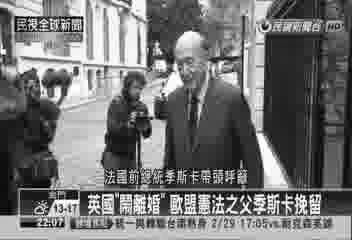

(0.0, 255.0)

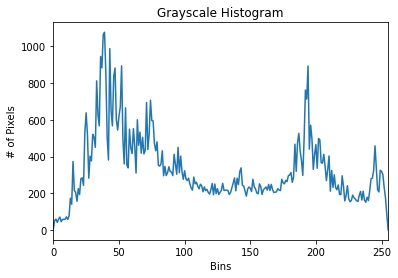

In [ ]:
news_img = load_images_from_folder(news_dir)
img = cv2_imshow(news_img[90])

hist = cv2.calcHist([news_img[90]], [0], None, [256], [0, 255])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 255])

# GrayDetection

In [ ]:
class GrayDetection:
  def __init__(self, img, threshold=0.3):
    self.img = img
    self.threshold = threshold
    self.result = []
    self.shot_frames = []
  def detect(self):
    for index in range(0, len(self.img)-1):
      hist = cv2.calcHist([self.img[index]], [0], None, [256], [0,255])
      hist_next = cv2.calcHist([self.img[index+1]], [0], None, [256], [0,255])
      diff = 0
      hist_sum = 0
      for hist_index, hist_value in enumerate(hist):
        hist_sum += hist_value[0]
        diff += abs(hist_next[hist_index][0] - hist_value[0])
      self.result.append(diff/hist_sum)
  def shot_change_frames(self):
    for i,v in enumerate(self.result):
        if v > self.threshold:
          self.shot_frames.append(i+1)
    return self.shot_frames

  def line_chart(self, frame_range=0):
    if frame_range==0:
      frame_range = len(self.result)
    plt.title("Grayscale histogram change of each frames")
    plt.xlabel("Frames")
    plt.ylabel("Hist change ratio")
    plt.axhline(y=self.threshold,linewidth=1, color='r')
    plt.plot(self.result[0:frame_range])

[73, 235, 301, 370, 451, 452, 861, 1281]
[73, 235, 301, 370, 452, 861, 1281]


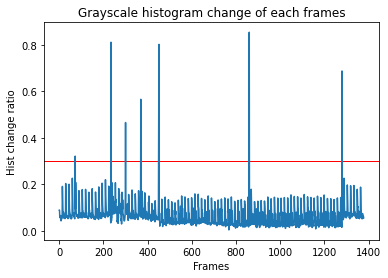

In [ ]:
news_ans =[73, 235, 301, 370, 452, 861, 1281]
news_gd = GrayDetection(news_img, threshold=0.3)
news_gd.detect()
news_gd.line_chart()
print(news_gd.shot_change_frames())
print(news_ans)

[127, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 203, 204, 205, 207, 209, 210, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 235, 237, 285, 339, 340, 383, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 438, 440, 441, 456, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 538, 540, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632,

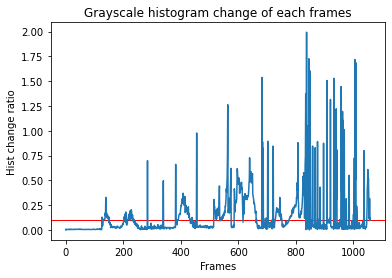

In [ ]:
ngc_ans = [127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,285,340,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 456, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 683, 703, 722, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 859, 868, 876, 885, 897, 909, 921, 933, 943, 958, 963, 965, 969, 976, 986, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1038, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059]
ngc_img = load_images_from_folder(ngc_dir)
ngc_gd = GrayDetection(ngc_img, threshold=0.1)
ngc_gd.detect()
ngc_gd.line_chart()
print(ngc_gd.shot_change_frames())
print(ngc_ans)

[1, 2, 12, 13, 23, 24, 34, 35, 39, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 77, 78, 79, 82, 87, 89, 90, 91, 92, 100, 101, 111, 112, 113, 118, 119, 123, 124, 134, 135, 140, 145, 146, 156, 157, 167, 168, 178, 179, 189, 190, 200, 201, 211, 212, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 234, 235, 245, 246, 256, 257, 258, 267, 268, 278, 279, 284, 289, 290, 300, 301, 303, 311, 312, 322, 323, 327, 333, 334, 335, 345, 346, 356, 357, 366, 367, 368, 378, 379, 385, 386, 387, 388, 389, 390, 400, 401, 411, 412, 422, 423, 426, 433, 434, 444, 445, 446, 456, 457, 465, 467, 468, 478, 479, 489, 490, 499, 500, 501, 511, 512, 522, 523, 529, 533, 534, 544, 545, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 567, 568, 578, 579, 589, 590, 600, 601, 611, 612, 617, 622, 623, 633, 634, 638, 641, 642, 643, 644, 645, 655, 656, 658, 666, 667, 668, 678, 679, 689, 690, 700, 701, 702, 703, 704, 705, 706, 707, 711, 712, 7

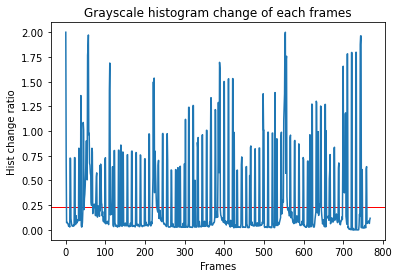

In [ ]:
ftfm_ans = [1,2,3,4,5,6,7,8,29,49,66,90,134,148,149,150,151,152,153,154,155,156,157,178,206,225,298,299,300,301,302,303,304,305,331,355,372,394,429,446,447,448,449,450,483,518,549,576,594,595,596,597,598,599,600,601,630
,655,674,692,730]
ftfm_img = load_images_from_folder(ftfm_dir)
ftfm_gd = GrayDetection(ftfm_img, threshold=0.23)
ftfm_gd.detect()
ftfm_gd.line_chart()
print(ftfm_gd.shot_change_frames())
print(ftfm_ans)

[0.5114915951813915, 0.4759763231519804, 0.4622303405859095, 0.4391431015746029, 0.4410853430137113, 0.4509584036625124, 0.460126245693542, 0.45219542648384936, 0.45995283127933595, 0.46912067331036555, 0.47828851534139516, 0.4804041711947097, 0.4839302642835672, 0.48675113875465326, 0.49168766907905387, 0.49732941802122593, 0.5008555111100834, 0.5022659483456264, 0.5050868228167125, 0.5079076972877985, 0.5011214132118662, 0.5039422876829522, 0.5053527249184953, 0.5067631621540383, 0.5074683807718097]
[0.5035514205682273, 0.4928549815701161, 0.48894348894348894, 0.4821902235695339, 0.4825268817204301, 0.48529697204968947, 0.48789391290918155, 0.48524531668153437, 0.4874514577174984, 0.49012415975863166, 0.49289153343023256, 0.4935465448315248, 0.4946538461538461, 0.49555483150251345, 0.49716726158113295, 0.4990723562152134, 0.500300950026028, 0.500801282051282, 0.5018181818181818, 0.5028580024067388, 0.5004087962845897, 0.5014541701848203, 0.501986425378193, 0.5025253615368012, 0.50279

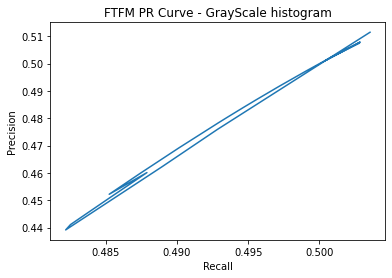

In [ ]:
precision = []
recall = []
max_pr = 0
best_thresh = 0
for thresh in np.arange(0.05, 0.3, 0.01):
  news_gd = GrayDetection(ftfm_img, threshold=thresh)
  news_gd.detect()
  news_gd.shot_change_frames()
  y_test, y_pred = converter(ftfm_img, news_gd.shot_change_frames(), ftfm_ans)
  p = precision_score(y_test, y_pred, average="macro")
  r = recall_score(y_test, y_pred, average="macro")
  if p*r > max_pr:
    max_pr = p*r
    best_thresh = thresh
  precision.append(p)
  recall.append(r)
print(precision)
print(recall)
print(best_thresh)
plt.title("FTFM PR Curve - GrayScale histogram")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall,precision)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("f1 score: {:5.3f}".format(f1_score(y_test, y_pred, average="macro")))
print("precision: {:5.3f}".format(precision_score(y_test, y_pred, average="macro")))
print("recall score: {:5.3f}".format(recall_score(y_test, y_pred, average="macro")))

f1 score: 0.344
precision: 0.511
recall score: 0.504


# Edge detection

In [ ]:
from skimage import measure
from skimage.morphology import dilation, square

class ECRDetection: # Edge Change Ratio
  def __init__(self, img, threshold=0.25, low_edge_threshold =50):
    self.img = img
    self.result = []
    self.shot_frames = []
    self.threshold = threshold
    self.low_edge_threshold = low_edge_threshold
  def detect(self):
    dilate_rate = 5
    high_edge_threshold = 200
    safe_div = lambda x,y: 0 if y == 0 else x / y
    for index in range(0, len(self.img)-1):
      edge = cv2.Canny(self.img[index], self.low_edge_threshold, high_edge_threshold)
      dilated = cv2.dilate(edge, np.ones((dilate_rate, dilate_rate)))
      inverted = (255 - dilated)
      edge2 = cv2.Canny(self.img[index+1], self.low_edge_threshold, high_edge_threshold)
      dilated2 = cv2.dilate(edge2, np.ones((dilate_rate, dilate_rate)))
      inverted2 = (255 - dilated2)
      log_and1 = (edge2 & inverted)
      log_and2 = (edge & inverted2)
      pixels_sum_new = np.sum(edge)
      pixels_sum_old = np.sum(edge2)
      out_pixels = np.sum(log_and1)
      in_pixels = np.sum(log_and2)
      self.result.append(max(safe_div(float(in_pixels),float(pixels_sum_new)), safe_div(float(out_pixels),float(pixels_sum_old))))
    # plt.imshow(log_and1)
    return self.result
  def shot_change_frames(self):
    for i,v in enumerate(self.result):
        if v > self.threshold:
          self.shot_frames.append(i+1)
    return self.shot_frames
  def line_chart(self, frame_range=0):
    if frame_range==0:
      frame_range = len(self.result)
    plt.title("ECR rate of each frames")
    plt.xlabel("Frame number")
    plt.ylabel("ECR")
    plt.axhline(y=self.threshold,linewidth=1, color='r')
    plt.plot(self.result[0:frame_range])


[73, 235, 301, 370, 452, 861, 1281]
[73, 235, 301, 370, 452, 861, 1281]


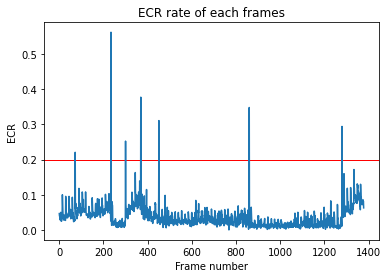

In [ ]:
news_ecr = ECRDetection(news_img, threshold=0.2, low_edge_threshold = 20)
news_ecr.detect()
news_ecr.line_chart()
print(news_ecr.shot_change_frames())
print(news_ans)


[5, 127, 216, 285, 340, 558, 559, 560, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 575, 576, 577, 578, 580, 683, 703, 739, 740, 804, 808, 809, 810, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 833, 837, 838, 841, 843, 844, 846, 850, 859, 868, 876, 909, 921, 933, 940, 941, 943, 958, 959, 960, 961, 963, 965, 966, 969, 976, 1004, 1006, 1007, 1008, 1009, 1038, 1052]
[127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 285, 340, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401

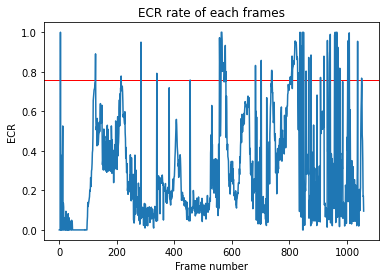

In [ ]:
ngc_ecr = ECRDetection(ngc_img, threshold = 0.76, low_edge_threshold = 20)
ngc_ecr.detect()
ngc_ecr.line_chart()
print(ngc_ecr.shot_change_frames())
print(ngc_ans)

[1, 2, 3, 4, 5, 6, 9, 10, 12, 13, 15, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 123, 124, 134, 135, 140, 143, 144, 145, 146, 156, 157, 167, 168, 178, 179, 189, 190, 200, 201, 208, 210, 211, 212, 213, 214, 215, 216, 217, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 267, 268, 278, 279, 284, 285, 286, 287, 289, 290, 300, 301, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 333, 334, 335, 345, 346, 356, 

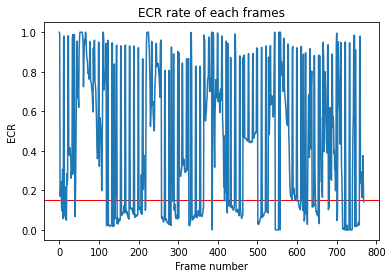

In [ ]:
ftfm_ecr = ECRDetection(ftfm_img, threshold = 0.15, low_edge_threshold = 150)
ftfm_ecr.detect()
ftfm_ecr.line_chart()
print(ftfm_ecr.shot_change_frames())
print(ftfm_ans)

[0.43737427454970057, 0.44513167934518716, 0.4472473351985017, 0.4425767069758838, 0.4439871442114268, 0.4439871442114268, 0.44469236282919833, 0.4482184559180559, 0.45103933038914196, 0.4463687021665241, 0.4484843580198386, 0.4506000138731531, 0.45271566972646765, 0.4555365441975537, 0.4569469814330967, 0.45580244629933636, 0.45862332077042245, 0.464970288330366, 0.46708594418368055, 0.4699068186547666, 0.4734329117436241, 0.47695900483248166, 0.4783694420680247, 0.4797798793035677, 0.4818955351568822, 0.4744040324631783, 0.4676177483872459, 0.4697334042405604, 0.46506277601794255, 0.45968692917755327, 0.4543110823371639, 0.4550163009549354, 0.4578371754260214, 0.46065804989710746, 0.462773705750422, 0.4648893616037365, 0.46982589192813706, 0.4719415477814516, 0.4590741982473583, 0.46260029133621583, 0.46612638442507337, 0.4703576961317024, 0.47247335198501705, 0.4745890078383316, 0.4767046636916461, 0.48093597539827515, 0.4851672871049042, 0.48798816157599023, 0.4922194732826193, 0.4

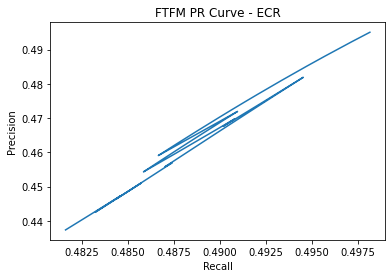

In [ ]:
precision = []
recall = []
max_pr = 0
best_thresh = 0
for thresh in np.arange(0.3, 0.8, 0.01):
  ngc_ecr = ECRDetection(ftfm_img, threshold=thresh, low_edge_threshold = 150)
  ngc_ecr.detect()
  ngc_ecr.shot_change_frames()
  y_test, y_pred = converter(ftfm_img, ngc_ecr.shot_change_frames(), ftfm_ans)
  p = precision_score(y_test, y_pred, average="macro")
  r = recall_score(y_test, y_pred, average="macro")
  if p*r > max_pr:
    max_pr = p*r
    best_thresh = thresh
  precision.append(p)
  recall.append(r)
print(precision)
print(recall)
print(best_thresh)
plt.title("FTFM PR Curve - ECR")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(recall,precision)

In [ ]:
def converter(img, pred, ans):
  pred_conv = []
  ans_conv = []
  for i in range(0, len(img)):
    if i in pred:
      pred_conv.append(1)
    else:
      pred_conv.append(0)
    if i in ans:
      ans_conv.append(1)
    else:
      ans_conv.append(0)
  return pred_conv, ans_conv
      

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("f1 score: {:5.3f}".format(f1_score(y_test, y_pred, average="macro")))
print("precision: {:5.3f}".format(precision_score(y_test, y_pred, average="macro")))
print("recall score: {:5.3f}".format(recall_score(y_test, y_pred, average="macro")))

f1 score: 0.466
precision: 0.495
recall score: 0.498
